# Assignment 1

## Loading data

In [9]:
from aa import DataLoader
from aa import extract_features
from aa import check_output

In [10]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE
import torch

device = torch.device("cuda")

In [11]:
dataset = DataLoader(data_dir="DDICorpus", device=device)

self.max_sample_length 87 72 66 87


In [12]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-MedLine.d69.s0,0,0,12,TRAIN
1,DDI-MedLine.d69.s0,1,13,23,TRAIN
2,DDI-MedLine.d69.s0,2,24,26,TRAIN
3,DDI-MedLine.d69.s0,3,27,35,TRAIN
4,DDI-MedLine.d69.s0,4,36,51,TRAIN


In [13]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-MedLine.d69.s0,4,70,84
1,DDI-MedLine.d69.s0,4,141,150
2,DDI-MedLine.d69.s0,4,156,165
3,DDI-MedLine.d69.s1,4,28,42
4,DDI-MedLine.d69.s1,4,96,105


In [14]:
dataset.vocab[:15]

[['differential', 0],
 ['regulation', 1],
 ['of', 2],
 ['tyrosine', 3],
 ['phosphorylation', 4],
 ['in', 5],
 ['tumor', 6],
 ['cells', 7],
 ['by', 8],
 ['contortrostatin,', 9],
 ['a', 10],
 ['homodimeric', 11],
 ['disintegrin,', 12],
 ['and', 13],
 ['monomeric', 14]]

In [15]:
dataset.id2ner

{0: 'O', 1: 'drug', 2: 'group', 3: 'brand', 4: 'drug_n'}

In [16]:
dataset.max_sample_length

87

In [17]:
dataset.get_random_sample()

'our results suggest that alterations of cation-chloride cotransporter functions, comprising a higher nkcc1 action, contribute to hyperexcitability within the hippocampus following se.'

### Data Exploration

ner_counts_train 1972
ner_counts_val 712
ner_counts_test 141


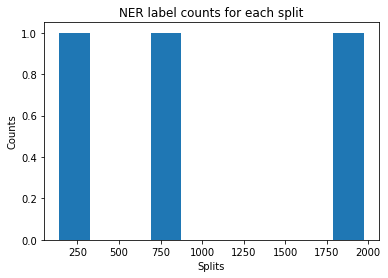

In [18]:
dataset.plot_split_ner_distribution()

### Labels

In [20]:
train_y, val_y, test_y = check_output(dataset.get_y())

AttributeError: 'list' object has no attribute 'numel'

In [24]:
train_labels_tensor=torch.Tensor(torch.nn.functional.pad(dataset.train_labels, pad=(0, dataset.max_sample_length - len(dataset.train_labels)), mode='constant', value=-1))

AttributeError: 'list' object has no attribute 'dim'

In [18]:
len(dataset.val_labels)

33229

## Extracting Features

In [4]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        #Add any addtional arguments here
                                                       ))

TypeError: 'NoneType' object is not iterable

## Bonus Part: Explore Some more

In [ ]:
#uncomment the code below if you want to do bonus part

Ner_count_train [1972]
Ner_count_val [712]
Ner_count_test [141]


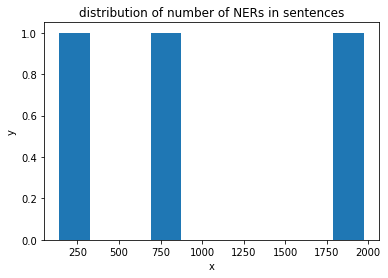

In [25]:
dataset.plot_ner_per_sample_distribution()

In [26]:
dataset.plot_sample_length_distribution()

length_train [19, 36, 23, 23, 16, 32, 19, 14, 17, 1, 10, 24, 33, 28, 27, 39, 18, 25, 19, 47, 26, 41, 12, 8, 20, 46, 27, 23, 28, 36, 21, 9, 19, 13, 16, 37, 10, 36, 9, 8, 13, 16, 26, 14, 10, 24, 17, 24, 20, 11, 16, 14, 25, 17, 30, 18, 23, 19, 10, 20, 33, 25, 7, 15, 13, 25, 38, 22, 21, 1, 15, 28, 34, 6, 16, 30, 20, 34, 7, 32, 19, 20, 19, 21, 15, 17, 1, 3, 40, 1, 9, 7, 12, 13, 16, 28, 13, 31, 16, 9, 17, 29, 5, 9, 39, 12, 30, 16, 51, 15, 42, 47, 24, 28, 29, 25, 41, 23, 27, 47, 8, 11, 13, 21, 11, 33, 18, 50, 31, 10, 10, 33, 22, 10, 15, 23, 26, 42, 14, 13, 21, 24, 15, 13, 33, 26, 42, 11, 54, 21, 43, 18, 28, 14, 38, 11, 30, 25, 24, 13, 33, 17, 19, 12, 11, 24, 7, 16, 19, 10, 5, 26, 14, 24, 31, 9, 34, 43, 11, 16, 25, 16, 6, 22, 18, 13, 14, 21, 33, 29, 23, 24, 17, 30, 20, 4, 39, 23, 28, 13, 25, 19, 6, 27, 32, 26, 25, 28, 23, 16, 23, 12, 24, 14, 12, 26, 9, 15, 41, 36, 11, 13, 13, 8, 19, 12, 32, 12, 18, 20, 17, 33, 22, 8, 17, 18, 13, 19, 24, 14, 22, 27, 15, 17, 10, 28, 24, 10, 25, 45, 4, 13, 34, 6,

NameError: name 'ner_counts_val' is not defined

In [ ]:
#dataset.plot_ner_cooccurence_venndiagram()